In [178]:
import pandas as pd
import json
import os
from langdetect import detect, detect_langs

In [179]:
df = pd.read_csv("/Users/viru/Documents/MP_I/data/categories_data/all_posts_analyzed-pv.csv")
df.head()

,url,distribution,hashtags,post_code,caption
0,https://www.instagram.com/p/C232I_fNAQo/,Affective,"['ExploreTheImpossible', 'BharatMobilityExpo20...",C232I_fNAQo.jpg,congratulations to the contest winner heres wh...
1,https://www.instagram.com/p/CrVS6z8tk1-/,Affective,['GreenAuction'],CrVS6z8tk1-.jpg,were looking for indias meanest green warriors...
2,https://www.instagram.com/p/CqVCMYWtLgV/,Affective,"['TogetherWeRise', 'SamNoVaruna', 'MaritimeInd...",CqVCMYWtLgV.jpg,to create huge waves across the coast of india...
3,https://www.instagram.com/p/C2ZJs_Pyoh8/,Affective,"['ad', 'mahindra', 'mahindraxuv700']",C2ZJs_Pyoh8.jpg,lets get up close and personal inside my xuv t...
4,https://www.instagram.com/p/CrnTxiGBusD/,Affective,"['XUV400', 'RCB', 'ExploreThelmpossible', 'Mah...",CrnTxiGBusD.jpg,were always charged up to take the challenge h...


In [180]:
df.shape

(20847, 5)

In [181]:
df['distribution'].unique()

array(['Affective', 'Negative', 'Cognitive', 'Behavioral'], dtype=object)

In [182]:
df.groupby('distribution').size().reset_index(name='count')

,distribution,count
0,Affective,20238
1,Behavioral,197
2,Cognitive,37
3,Negative,375


In [183]:
def detect_language_in_caption(caption):
    language = detect_langs(caption)

    lan = ''
    lan_prob = 0

    for langs in language:
        if(lan_prob < langs.prob):
            lan_prob = langs.prob
            lan = langs.lang
    
    return lan

def get_lang_distn(caption):
    language = detect_langs(caption)

    lang_dist = []

    for langs in language:
        lang_dist.append({langs.lang: langs.prob})
    
    return lang_dist

In [184]:
df.dropna(subset=['caption'], inplace=True)

In [185]:
df['caption'].isna().sum()

0

In [186]:
df['lang'] = df['caption'].apply(detect_language_in_caption)
df.head()

,url,distribution,hashtags,post_code,caption,lang
0,https://www.instagram.com/p/C232I_fNAQo/,Affective,"['ExploreTheImpossible', 'BharatMobilityExpo20...",C232I_fNAQo.jpg,congratulations to the contest winner heres wh...,en
1,https://www.instagram.com/p/CrVS6z8tk1-/,Affective,['GreenAuction'],CrVS6z8tk1-.jpg,were looking for indias meanest green warriors...,en
2,https://www.instagram.com/p/CqVCMYWtLgV/,Affective,"['TogetherWeRise', 'SamNoVaruna', 'MaritimeInd...",CqVCMYWtLgV.jpg,to create huge waves across the coast of india...,en
3,https://www.instagram.com/p/C2ZJs_Pyoh8/,Affective,"['ad', 'mahindra', 'mahindraxuv700']",C2ZJs_Pyoh8.jpg,lets get up close and personal inside my xuv t...,en
4,https://www.instagram.com/p/CrnTxiGBusD/,Affective,"['XUV400', 'RCB', 'ExploreThelmpossible', 'Mah...",CrnTxiGBusD.jpg,were always charged up to take the challenge h...,en


In [187]:
df['lang'].unique()

array(['en', 'fr', 'da', 'no', 'nl', 'af', 'it', 'et', 'ro', 'es', 'de',
       'hr', 'pl', 'id', 'tl', 'sv', 'sw', 'so', 'sq', 'tr', 'sl', 'cy',
       'ca', 'sk', 'cs', 'fi', 'lt', 'hu', 'pt'], dtype=object)

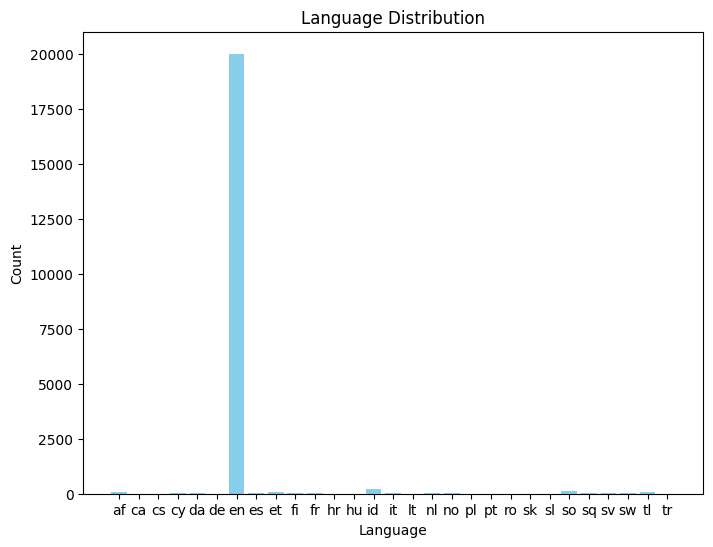

In [188]:
import matplotlib.pyplot as plt

lang_counts = df.groupby('lang').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(lang_counts['lang'], lang_counts['count'], color='skyblue')

# Adding title and labels
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')

# Show the plot
plt.show()

In [189]:
df['langs_prob'] = df['caption'].apply(get_lang_distn)
df.head()

,url,distribution,hashtags,post_code,caption,lang,langs_prob
0,https://www.instagram.com/p/C232I_fNAQo/,Affective,"['ExploreTheImpossible', 'BharatMobilityExpo20...",C232I_fNAQo.jpg,congratulations to the contest winner heres wh...,en,[{'en': 0.9999975653789805}]
1,https://www.instagram.com/p/CrVS6z8tk1-/,Affective,['GreenAuction'],CrVS6z8tk1-.jpg,were looking for indias meanest green warriors...,en,[{'en': 0.999998415218536}]
2,https://www.instagram.com/p/CqVCMYWtLgV/,Affective,"['TogetherWeRise', 'SamNoVaruna', 'MaritimeInd...",CqVCMYWtLgV.jpg,to create huge waves across the coast of india...,en,[{'en': 0.9999988665680846}]
3,https://www.instagram.com/p/C2ZJs_Pyoh8/,Affective,"['ad', 'mahindra', 'mahindraxuv700']",C2ZJs_Pyoh8.jpg,lets get up close and personal inside my xuv t...,en,[{'en': 0.999995913117641}]
4,https://www.instagram.com/p/CrnTxiGBusD/,Affective,"['XUV400', 'RCB', 'ExploreThelmpossible', 'Mah...",CrnTxiGBusD.jpg,were always charged up to take the challenge h...,en,[{'en': 0.9999982924719273}]


In [217]:
# Explode the 'langs_prob' column
df_expanded = df['langs_prob'].apply(lambda x: {k: v for d in x for k, v in d.items()})

# Convert the dictionaries to DataFrame and concatenate with the original DataFrame
df_langs = pd.json_normalize(df_expanded)
df_langs.fillna(0, inplace=True)
df_final = pd.concat([df, df_langs], axis=1).drop(columns=['langs_prob'])
df_final.head()

,url,distribution,hashtags,post_code,caption,lang,en,et,af,fr,...,lv,sw,pt,sq,tr,sk,cs,lt,hu,vi
0,https://www.instagram.com/p/C232I_fNAQo/,Affective,"['ExploreTheImpossible', 'BharatMobilityExpo20...",C232I_fNAQo.jpg,congratulations to the contest winner heres wh...,en,0.999998,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.instagram.com/p/CrVS6z8tk1-/,Affective,['GreenAuction'],CrVS6z8tk1-.jpg,were looking for indias meanest green warriors...,en,0.999998,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.instagram.com/p/CqVCMYWtLgV/,Affective,"['TogetherWeRise', 'SamNoVaruna', 'MaritimeInd...",CqVCMYWtLgV.jpg,to create huge waves across the coast of india...,en,0.999999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://www.instagram.com/p/C2ZJs_Pyoh8/,Affective,"['ad', 'mahindra', 'mahindraxuv700']",C2ZJs_Pyoh8.jpg,lets get up close and personal inside my xuv t...,en,0.999996,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.instagram.com/p/CrnTxiGBusD/,Affective,"['XUV400', 'RCB', 'ExploreThelmpossible', 'Mah...",CrnTxiGBusD.jpg,were always charged up to take the challenge h...,en,0.999998,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
df_final.dropna(subset=['caption'], inplace=True)

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_for_lang_df(cur_df, category):
    # Select only language columns
    language_columns = [col for col in cur_df.columns if col not in ['url', 'distribution', 'hashtags', 'post_code', 'caption', 'lang']]

    # Calculate the mean probability for each language
    mean_probabilities = cur_df[language_columns].mean().reset_index()
    mean_probabilities.columns = ['language', 'mean_probability']

    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(data=mean_probabilities, x='language', y='mean_probability', palette='viridis')
    plt.title(f'Mean Probability of Each Language in {category} category')
    plt.xlabel('Language')
    plt.ylabel('Mean Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot
    plt.show()

/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_32212/3085432462.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_probabilities, x='language', y='mean_probability', palette='viridis')


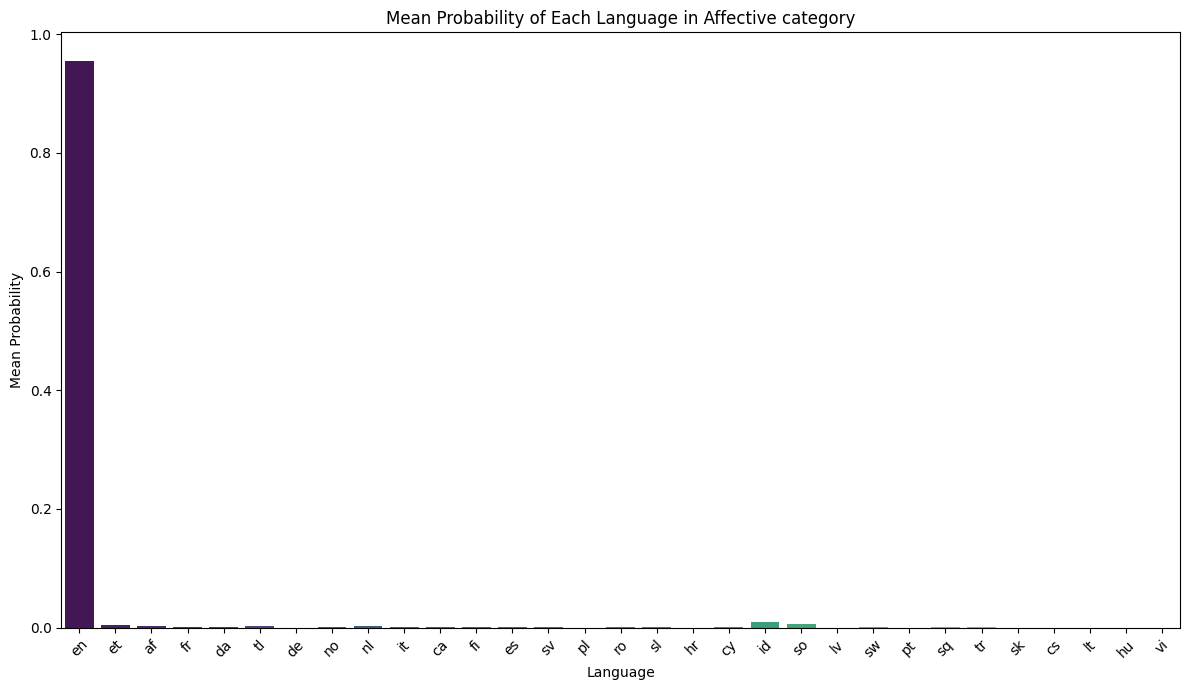

/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_32212/3085432462.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_probabilities, x='language', y='mean_probability', palette='viridis')


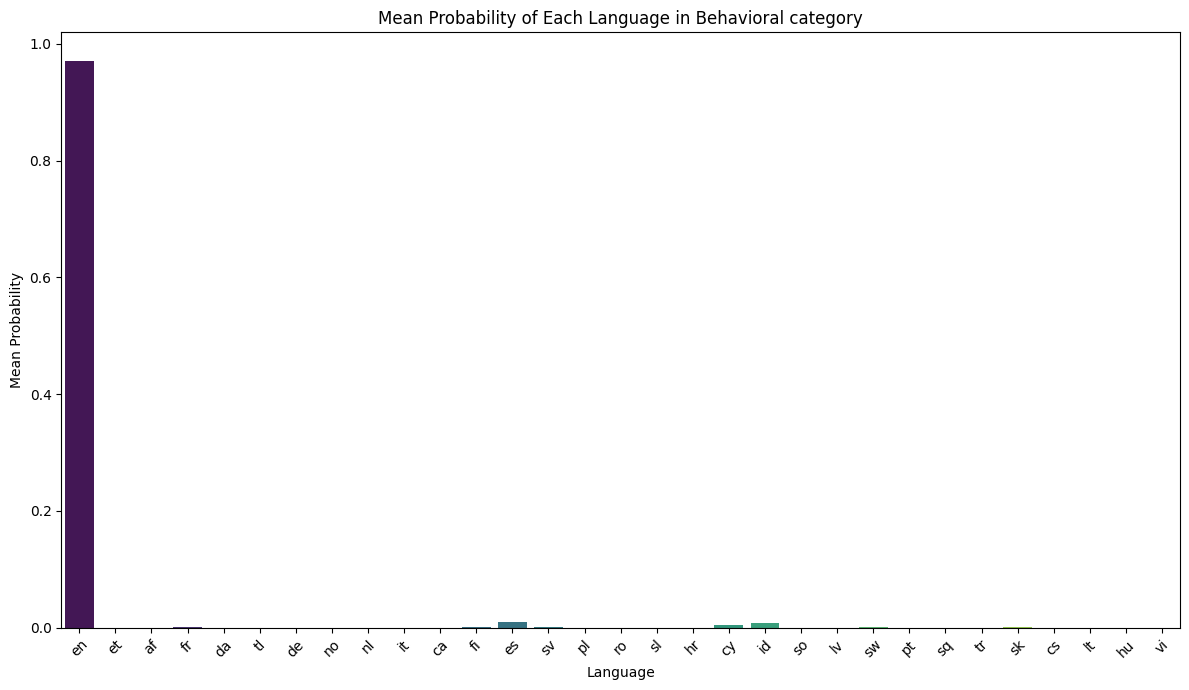

/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_32212/3085432462.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_probabilities, x='language', y='mean_probability', palette='viridis')


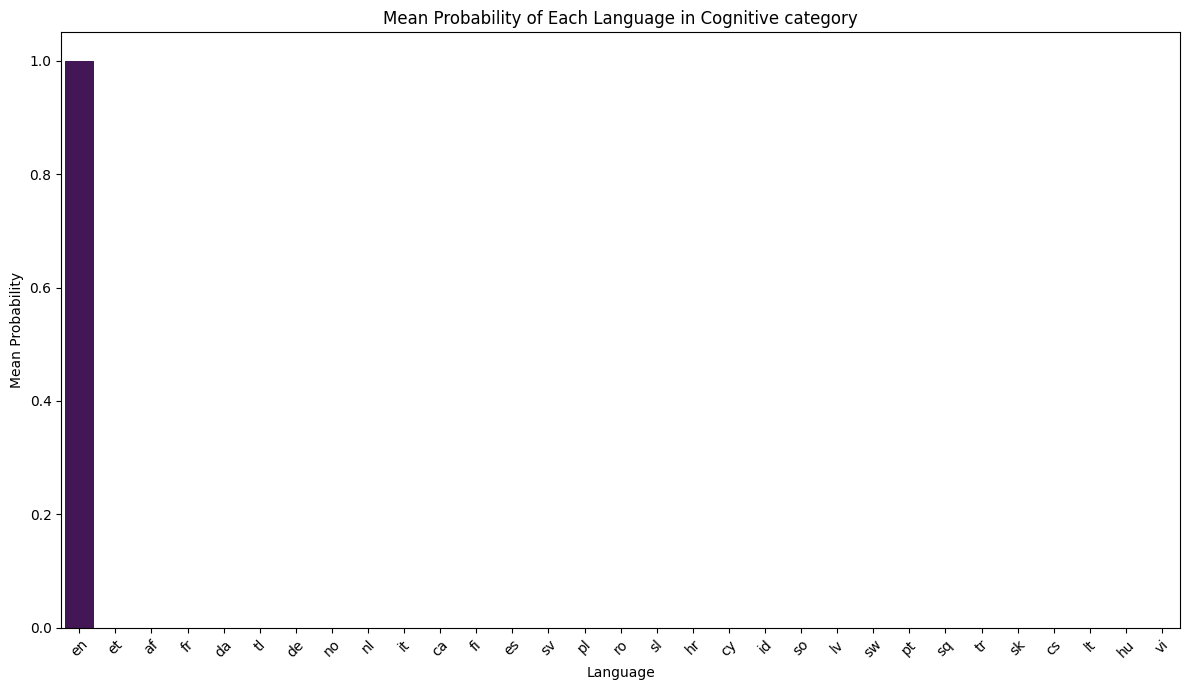

/var/folders/lp/thjl93cn1lg4b44b6kmtggvh0000gn/T/ipykernel_32212/3085432462.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_probabilities, x='language', y='mean_probability', palette='viridis')


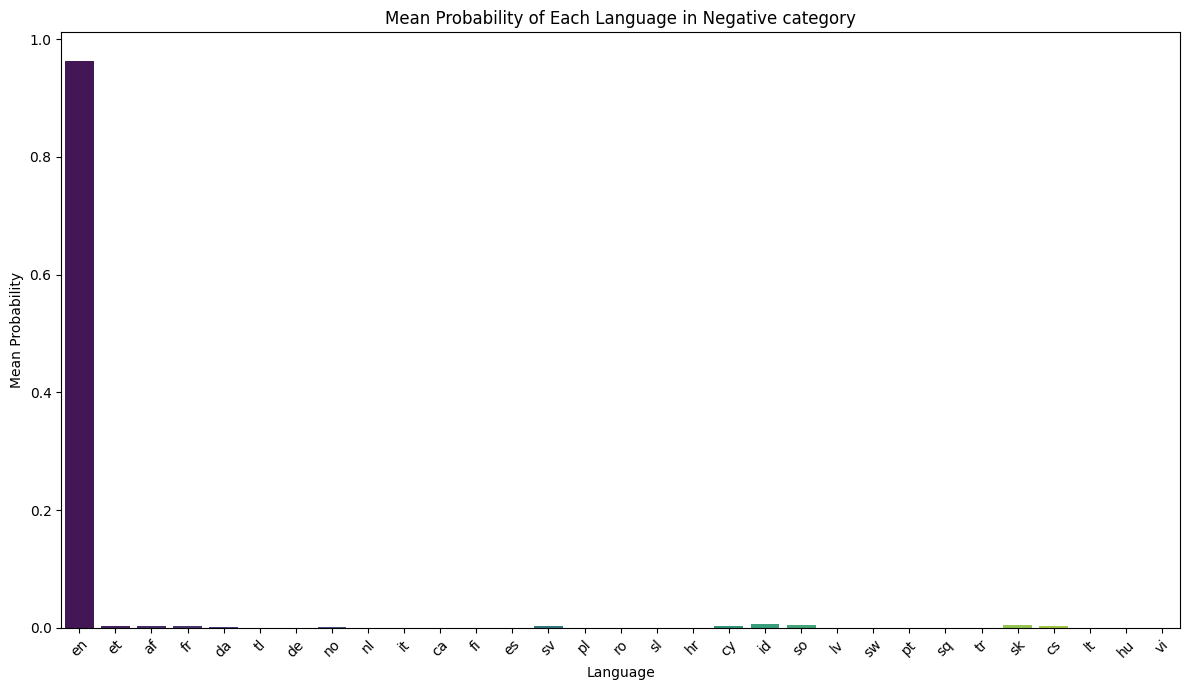

In [235]:
# Four Categories: ['Affective', 'Negative', 'Cognitive', 'Behavioral']

aff_df = df_final[df_final['distribution'] == 'Affective']
beh_df = df_final[df_final['distribution'] == 'Behavioral']
cogn_df = df_final[df_final['distribution'] == 'Cognitive']
neg_df = df_final[df_final['distribution'] == 'Negative']


plot_for_lang_df(aff_df, 'Affective')
plot_for_lang_df(beh_df, 'Behavioral')
plot_for_lang_df(cogn_df, 'Cognitive')
plot_for_lang_df(neg_df, 'Negative')

### **Extracting Basic Text Features**

In [245]:
import re

def preprocess_text(caption):
    # Remove punctuation, numbers, and special characters, keeping only words
    caption = re.sub(r'[^a-zA-Z\s]', '', caption)
    # Convert to lowercase
    caption = caption.lower()
    # Remove extra whitespace
    caption = ' '.join(caption.split())
    return caption

def countWords(caption):
    wordList = caption.split(' ')
    return len(wordList)

def characterCount(caption):
    text = caption.replace(" ", "")
    characters = [char for char in text]
    return len(characters)

def sentenceCount(caption):
    # Using regular expression to split the caption into sentences
    sentences = re.split(r'[.!?]', caption)

    sentences = [sentence for sentence in sentences if sentence.strip()]

    return len(sentences)

def calculateAvgWordLen(caption):
    wordList = caption.split(' ')
    totalLen = 0
    for word in wordList:
        totalLen += len(word)
    
    return totalLen/len(wordList)

def calculateAvgSentLen(caption):
    sentences = re.split(r'[.!?]', caption)
    wps = 0
    for sentence in sentences:
        if sentence.strip():
            words = sentence.split()
            wps += len(words)
    
    return wps/len(sentences)

### **Extracting Lingustic Features**

In [ ]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def extract_pos_tags(caption):
    # Process the caption
    doc = nlp(caption)

    # Extract the POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]

    return pos_tags

def extract_named_entity(caption):
    # Process the caption
    doc = nlp(caption)

    # Extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    return entities

def rearrangePosTags(captions):
    tags = {}
    for caption in captions:
        for word, pos_tag in caption:
            if pos_tag in tags:
                tags[pos_tag] += 1
            else:
                tags[pos_tag] = 1
    
    return tags

def rearrangeNamedEntityTags(captions):
    tags = {}
    for caption in captions:
        for name, entity in caption:
            if entity in tags:
                tags[entity] += 1
            else:
                tags[entity] = 1
    
    return tags

### **Extracting Semantic Features**

### **Flesch Reading Ease Score**

This score rates text on a 100-point scale. The higher the score, the easier it is to understand the text. For example:

90-100: Easily understandable by an average 11-year-old student.

60-70: Easily understandable by 13-15-year-old students.

0-30: Best understood by university graduates.

The formula for the Flesch Reading Ease score is:

206.835 − 1.015 * ( total sentences / total words ) * −84.6 * ( total words / total syllables )

-----

### **Flesch-Kincaid Grade Level**

This score translates the 0-100 scale into a U.S. school grade level, making it easier for teachers, parents, librarians, and others to judge the readability level of various books and texts. For example:

5.0: Easily understood by 5th graders. 

10.0: Easily understood by 10th graders.

12.0: Easily understood by 12th graders (high school seniors).

The formula for the Flesch-Kincaid Grade Level is:

0.39 * ( total words / total sentences ) + 11.8 *( total syllables / total words ) − 15.59

In [ ]:
import textstat
from textblob import TextBlob
from collections import Counter
from textblob import TextBlob
import numpy as np

def calculate_sentiment(captions):
    scores = []
    for caption in captions:
        blob = TextBlob(caption)
        sentiment = blob.sentiment.polarity
        # Normalize sentiment score from range [-1, 1] to [0, 1]
        normalized_sentiment = (sentiment + 1) / 2
        scores.append(normalized_sentiment)
    
    normalized_score = np.mean(scores)
    return normalized_score

def calculate_subjectivity(caption):
    blob = TextBlob(caption)
    subjectivity_scores = blob.sentiment.subjectivity

    return subjectivity_scores

def calculate_readability_scores(captions):
    readability_scores = []
    for caption in captions:
        reading_ease = textstat.flesch_reading_ease(caption)

        # Ensure scores are within the 0-100 range
        if reading_ease < 0:
            reading_ease = 0
        elif reading_ease > 100:
            reading_ease = 100

        # Normalize the readability score to 0-1 range
        normalized_reading_ease = reading_ease / 100
        readability_scores.append(normalized_reading_ease)

    reading_ease_score_mean = np.mean(readability_scores)
        
    return reading_ease_score_mean

def calculate_lexical_diversity(captions):
    scores = []
    for caption in captions:
        tokens = caption.split()
        num_tokens = len(tokens)
        num_types = len(set(tokens))
        ttr = num_types / num_tokens if num_tokens != 0 else 0
        scores.append(ttr)
    
    score = np.mean(scores)

    return score

# Function to calculate overall quality score
def calculate_overall_quality(readability, lexical_diversity, sentiment, weights=(0.4, 0.3, 0.3)):
    readability_weight, lexical_diversity_weight, sentiment_weight = weights
    overall_score = (
        readability_weight * readability +
        lexical_diversity_weight * lexical_diversity +
        sentiment_weight * sentiment
    )
    return overall_score

def get_overall_captions_quality(captions):
    # Calculate overall quality scores for each caption
    overall_quality_scores = calculate_overall_quality(calculate_readability_scores(captions), calculate_lexical_diversity(captions), calculate_sentiment(captions))

    # Calculate the final overall quality score for the influencer
    final_overall_quality_score = np.mean(overall_quality_scores)

    return final_overall_quality_score

### **Slang Analysis**

In [238]:
slang_df = pd.read_csv("/Users/viru/Documents/MP_I/data/categories_data/post_cap_slangs_pv.csv")
slang_df.head()

,url,distribution,hashtags,post_code,caption,No. of Slangs,Slangs
0,https://www.instagram.com/p/C232I_fNAQo/,Affective,"['ExploreTheImpossible', 'BharatMobilityExpo20...",C232I_fNAQo.jpg,congratulations to the contest winner heres wh...,9.0,"heres, stop at nothing, braved, c temperature,..."
1,https://www.instagram.com/p/CrVS6z8tk1-/,Affective,['GreenAuction'],CrVS6z8tk1-.jpg,were looking for indias meanest green warriors...,3.0,"meanest, onceina lifetime, green activities"
2,https://www.instagram.com/p/CqVCMYWtLgV/,Affective,"['TogetherWeRise', 'SamNoVaruna', 'MaritimeInd...",CqVCMYWtLgV.jpg,to create huge waves across the coast of india...,0.0,NaN
3,https://www.instagram.com/p/C2ZJs_Pyoh8/,Affective,"['ad', 'mahindra', 'mahindraxuv700']",C2ZJs_Pyoh8.jpg,lets get up close and personal inside my xuv t...,2.0,"xuv, head to"
4,https://www.instagram.com/p/CrnTxiGBusD/,Affective,"['XUV400', 'RCB', 'ExploreThelmpossible', 'Mah...",CrnTxiGBusD.jpg,were always charged up to take the challenge h...,3.0,"charged up, head on, like the"


In [243]:
slang_df.dropna(subset=['caption'], inplace=True)

In [246]:
slang_df['word_counts'] = slang_df['caption'].apply(countWords)
slang_df['char_counts'] = slang_df['caption'].apply(characterCount)
slang_df['sent_counts'] = slang_df['caption'].apply(sentenceCount)
slang_df['avg_word_len'] = slang_df['caption'].apply(calculateAvgWordLen)
slang_df['avg_sent_len'] = slang_df['caption'].apply(calculateAvgSentLen)

In [248]:
aff_slang_df = slang_df[slang_df['distribution'] == 'Affective']
beh_slang_df = slang_df[slang_df['distribution'] == 'Behavioral']
cogn_slang_df = slang_df[slang_df['distribution'] == 'Cognitive']
neg_slang_df = slang_df[slang_df['distribution'] == 'Negative']

In [250]:
slang_df.head()

,url,distribution,hashtags,post_code,caption,No. of Slangs,Slangs,word_counts,char_counts,sent_counts,avg_word_len,avg_sent_len
0,https://www.instagram.com/p/C232I_fNAQo/,Affective,"['ExploreTheImpossible', 'BharatMobilityExpo20...",C232I_fNAQo.jpg,congratulations to the contest winner heres wh...,9.0,"heres, stop at nothing, braved, c temperature,...",143,699,1,4.888112,143.0
1,https://www.instagram.com/p/CrVS6z8tk1-/,Affective,['GreenAuction'],CrVS6z8tk1-.jpg,were looking for indias meanest green warriors...,3.0,"meanest, onceina lifetime, green activities",94,455,1,4.840426,94.0
2,https://www.instagram.com/p/CqVCMYWtLgV/,Affective,"['TogetherWeRise', 'SamNoVaruna', 'MaritimeInd...",CqVCMYWtLgV.jpg,to create huge waves across the coast of india...,0.0,NaN,19,83,1,4.368421,19.0
3,https://www.instagram.com/p/C2ZJs_Pyoh8/,Affective,"['ad', 'mahindra', 'mahindraxuv700']",C2ZJs_Pyoh8.jpg,lets get up close and personal inside my xuv t...,2.0,"xuv, head to",34,150,1,4.411765,34.0
4,https://www.instagram.com/p/CrnTxiGBusD/,Affective,"['XUV400', 'RCB', 'ExploreThelmpossible', 'Mah...",CrnTxiGBusD.jpg,were always charged up to take the challenge h...,3.0,"charged up, head on, like the",22,82,1,3.727273,22.0


In [252]:
slang_df.columns

Index(['url', 'distribution', 'hashtags', 'post_code', 'caption',
       'No. of Slangs', 'Slangs', 'word_counts', 'char_counts', 'sent_counts',
       'avg_word_len', 'avg_sent_len'],
      dtype='object')

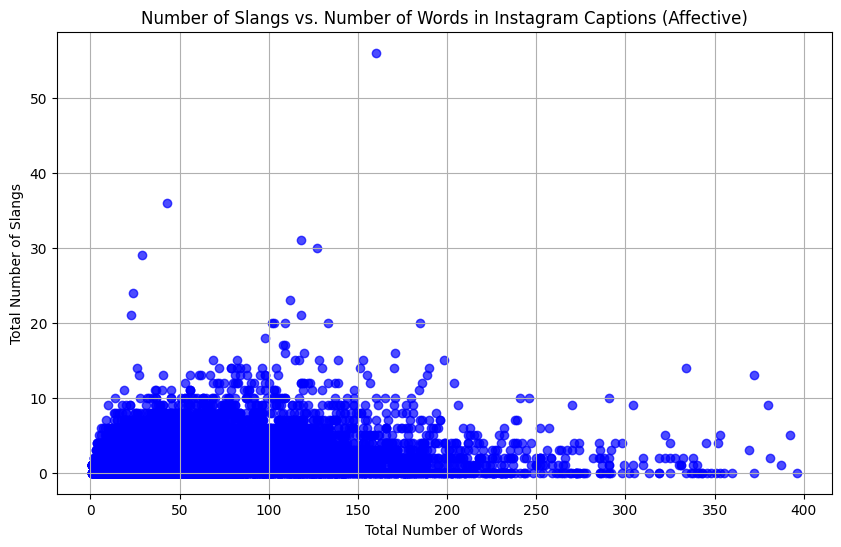

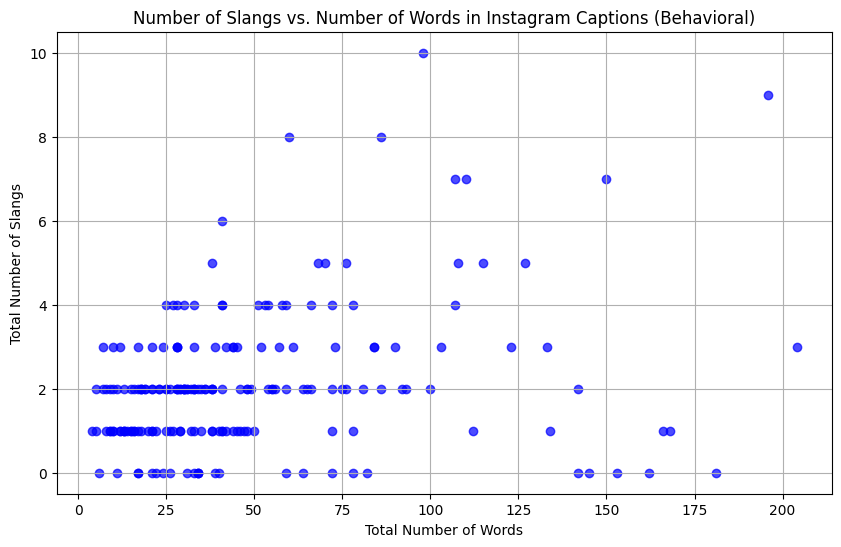

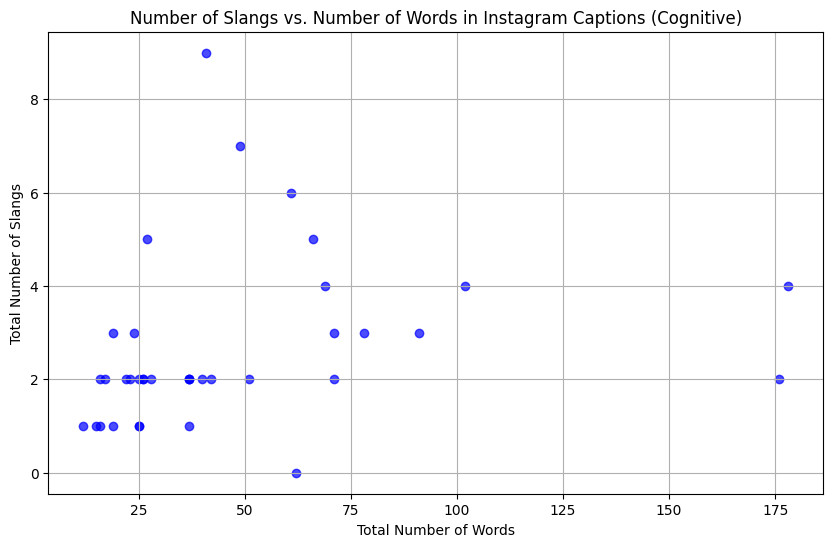

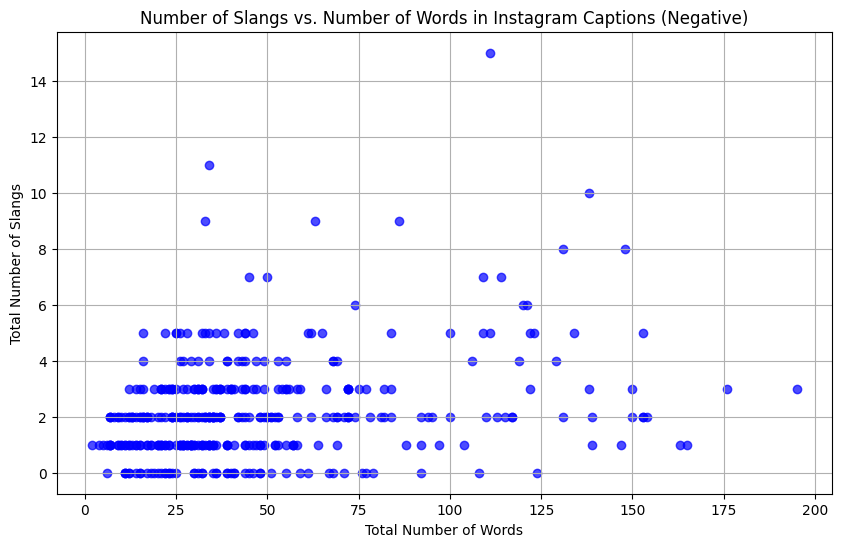

In [268]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aff_slang_df['word_counts'], aff_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Number of Words in Instagram Captions (Affective)')
plt.xlabel('Total Number of Words')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(beh_slang_df['word_counts'], beh_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Number of Words in Instagram Captions (Behavioral)')
plt.xlabel('Total Number of Words')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cogn_slang_df['word_counts'], cogn_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Number of Words in Instagram Captions (Cognitive)')
plt.xlabel('Total Number of Words')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(neg_slang_df['word_counts'], neg_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Number of Words in Instagram Captions (Negative)')
plt.xlabel('Total Number of Words')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

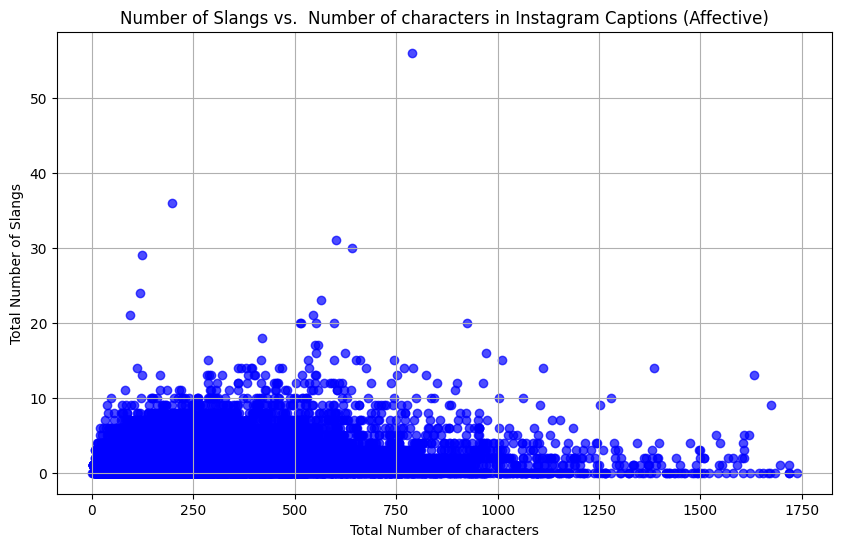

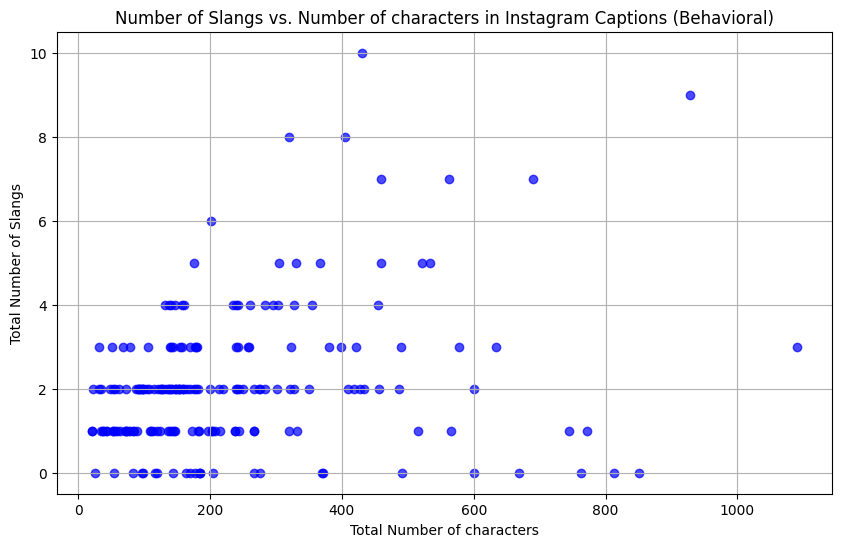

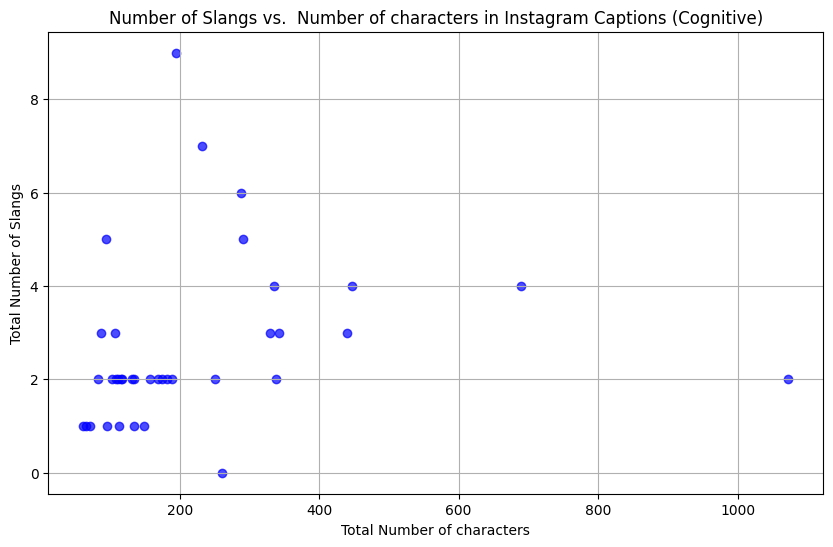

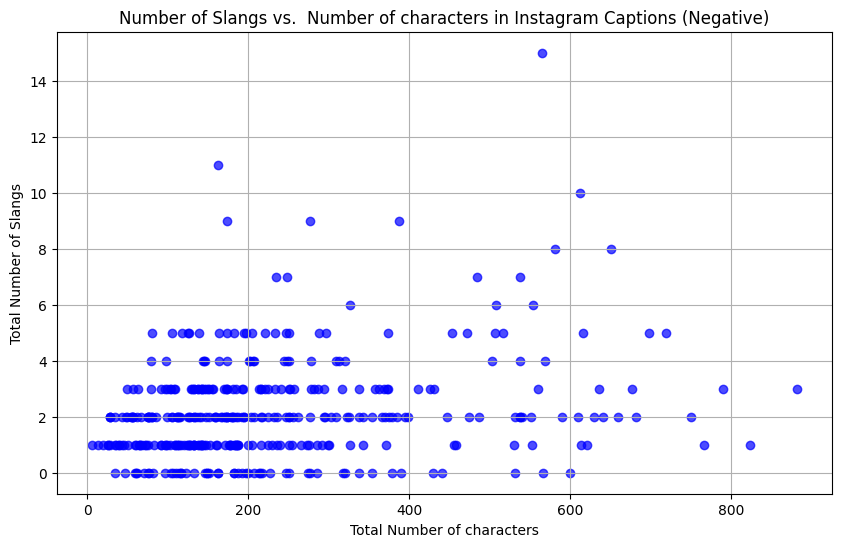

In [269]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aff_slang_df['char_counts'], aff_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs.  Number of characters in Instagram Captions (Affective)')
plt.xlabel('Total Number of characters')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(beh_slang_df['char_counts'], beh_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Number of characters in Instagram Captions (Behavioral)')
plt.xlabel('Total Number of characters')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cogn_slang_df['char_counts'], cogn_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs.  Number of characters in Instagram Captions (Cognitive)')
plt.xlabel('Total Number of characters')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(neg_slang_df['char_counts'], neg_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs.  Number of characters in Instagram Captions (Negative)')
plt.xlabel('Total Number of characters')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

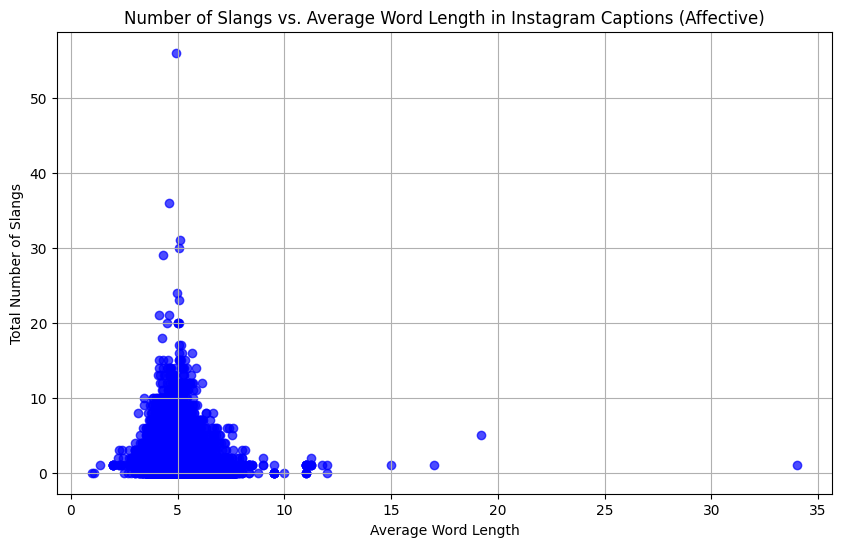

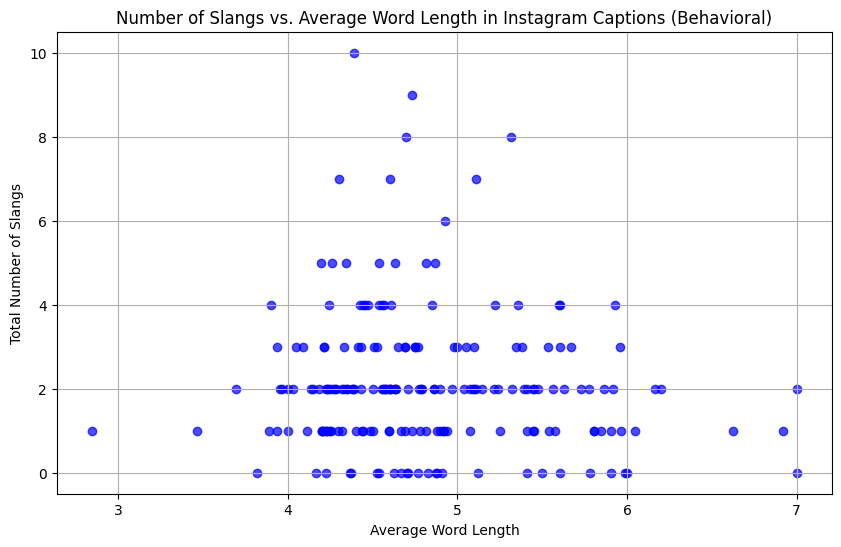

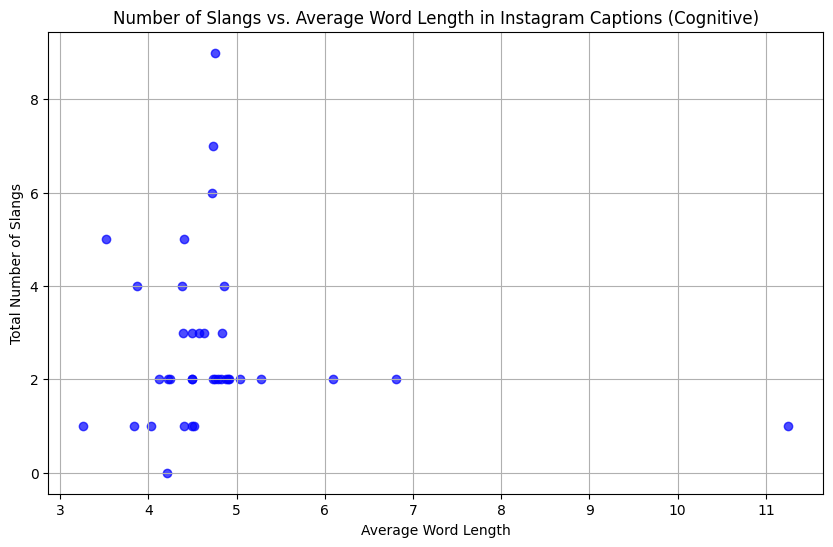

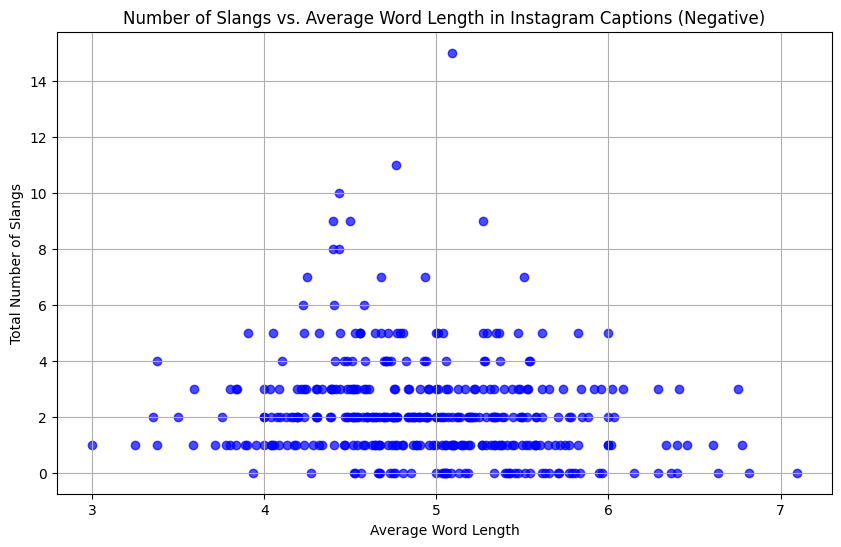

In [270]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aff_slang_df['avg_word_len'], aff_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Average Word Length in Instagram Captions (Affective)')
plt.xlabel('Average Word Length')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(beh_slang_df['avg_word_len'], beh_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Average Word Length in Instagram Captions (Behavioral)')
plt.xlabel('Average Word Length')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cogn_slang_df['avg_word_len'], cogn_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Average Word Length in Instagram Captions (Cognitive)')
plt.xlabel('Average Word Length')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(neg_slang_df['avg_word_len'], neg_slang_df['No. of Slangs'], color='blue', alpha=0.7)
plt.title('Number of Slangs vs. Average Word Length in Instagram Captions (Negative)')
plt.xlabel('Average Word Length')
plt.ylabel('Total Number of Slangs')
plt.grid(True)
plt.show()